# **FLIGHT PRICE ANALYSIS**

**Problem Statement**

The project aims to analyze and predict flight ticket prices based on various factors such as airline, source, destination, journey date, total stops, and duration. Flight pricing is a complex problem influenced by multiple features, including demand, airline policies, and timing. This analysis helps identify trends and build a predictive model to estimate ticket prices, providing valuable insights for travelers and businesses alike.

**Content**                                                  
1.**Import Packages**    
2.**Read Data**                                                      
3.**Understand and Prepare the Data**                                          
3.1 - Data Types and Dimensions              
3.2 - Feature Engineering              
4.**Splitting and training the data**          
4.1 - Prepare the Data           
4.2 - Scale the Data                
4.3 - Machine learning algorithms                        
5.**Testing Data**                 
6.**Conclusion**

**Import Packages**

In [37]:
import pandas as pd
import pandas as numpy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

EXPLORATORY DATA ANALYSIS-**Read the data**




In [6]:
df=pd.read_excel("/content/Flight_Price_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [7]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**Understand and Prepare the Data**

**Data Types and Dimensions**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
df.shape

(10683, 11)

In [11]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [12]:
df['Route'].fillna(df['Route'].bfill(),inplace=True)
df['Total_Stops'].fillna(df['Total_Stops'].bfill(),inplace=True)

<ipython-input-12-07898608db07>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Route'].fillna(df['Route'].bfill(),inplace=True)
<ipython-input-12-07898608db07>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [13]:
df.duplicated().sum()


220

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [15]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


**Feature Engineering**

In [16]:
df['Date']=pd.to_datetime(df['Date_of_Journey']).dt.day
df['Month']=pd.to_datetime(df['Date_of_Journey']).dt.month
df['Year']=pd.to_datetime(df['Date_of_Journey']).dt.year


<ipython-input-16-605268784614>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date_of_Journey']).dt.day
<ipython-input-16-605268784614>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Month']=pd.to_datetime(df['Date_of_Journey']).dt.month
<ipython-input-16-605268784614>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Year']=pd.to_datetime(df['Date_of_Journey']).dt.year


In [17]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [18]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [19]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


**VISUALIZATION**

0    Jet Airways
Name: Airline, dtype: object


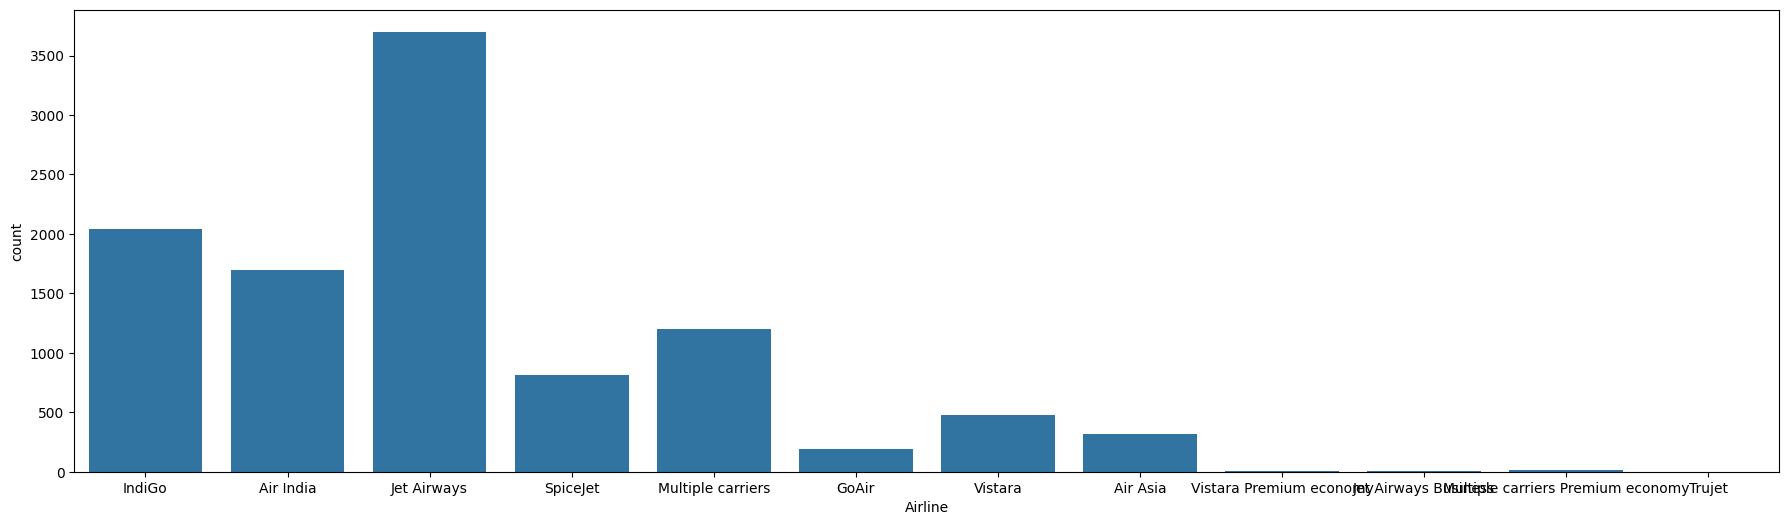

In [20]:
#a
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 6))
sns.countplot(x='Airline',data=df)

most_pref=df['Airline'].mode()
print(most_pref)

0    Delhi
Name: Source, dtype: object


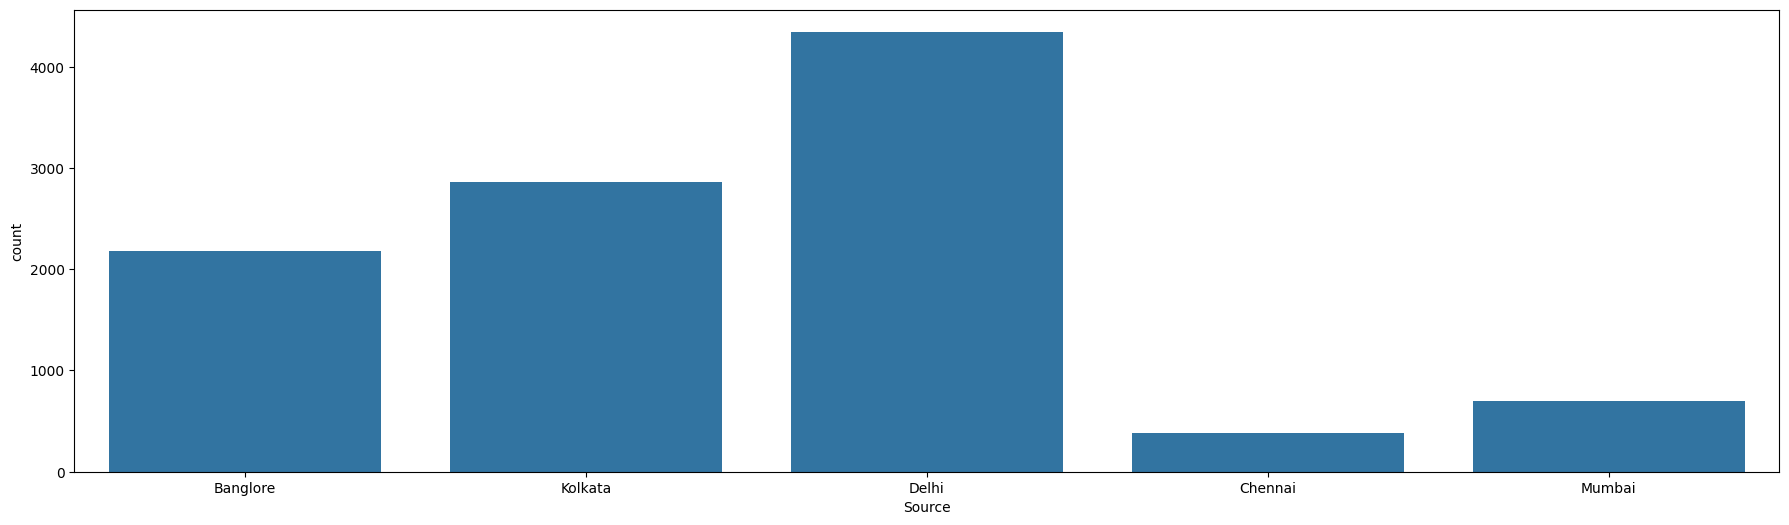

In [21]:
#b
plt.figure(figsize=(22, 6))
sns.countplot(x='Source',data=df)

maj_takeoff=df['Source'].mode()
print(maj_takeoff)


0    Cochin
Name: Destination, dtype: object


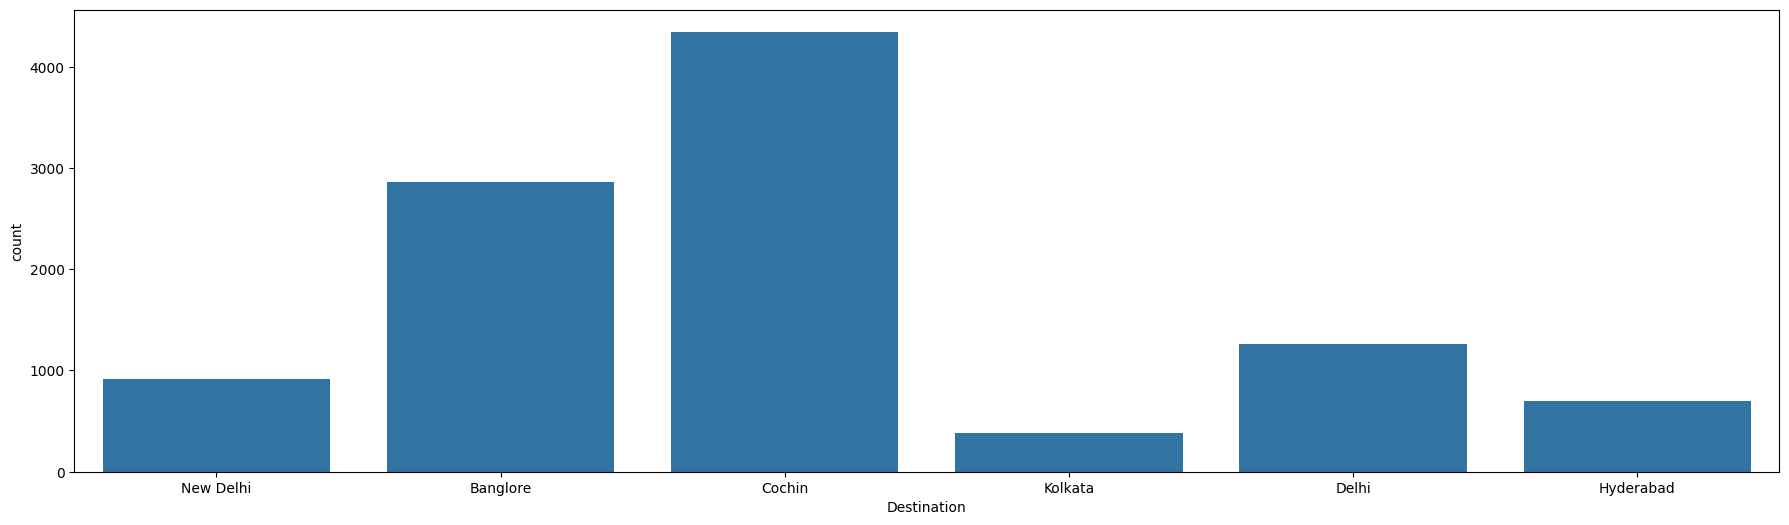

In [22]:
plt.figure(figsize=(22, 6))
sns.countplot(x='Destination',data=df)

most_dest=df['Destination'].mode()
print(most_dest)


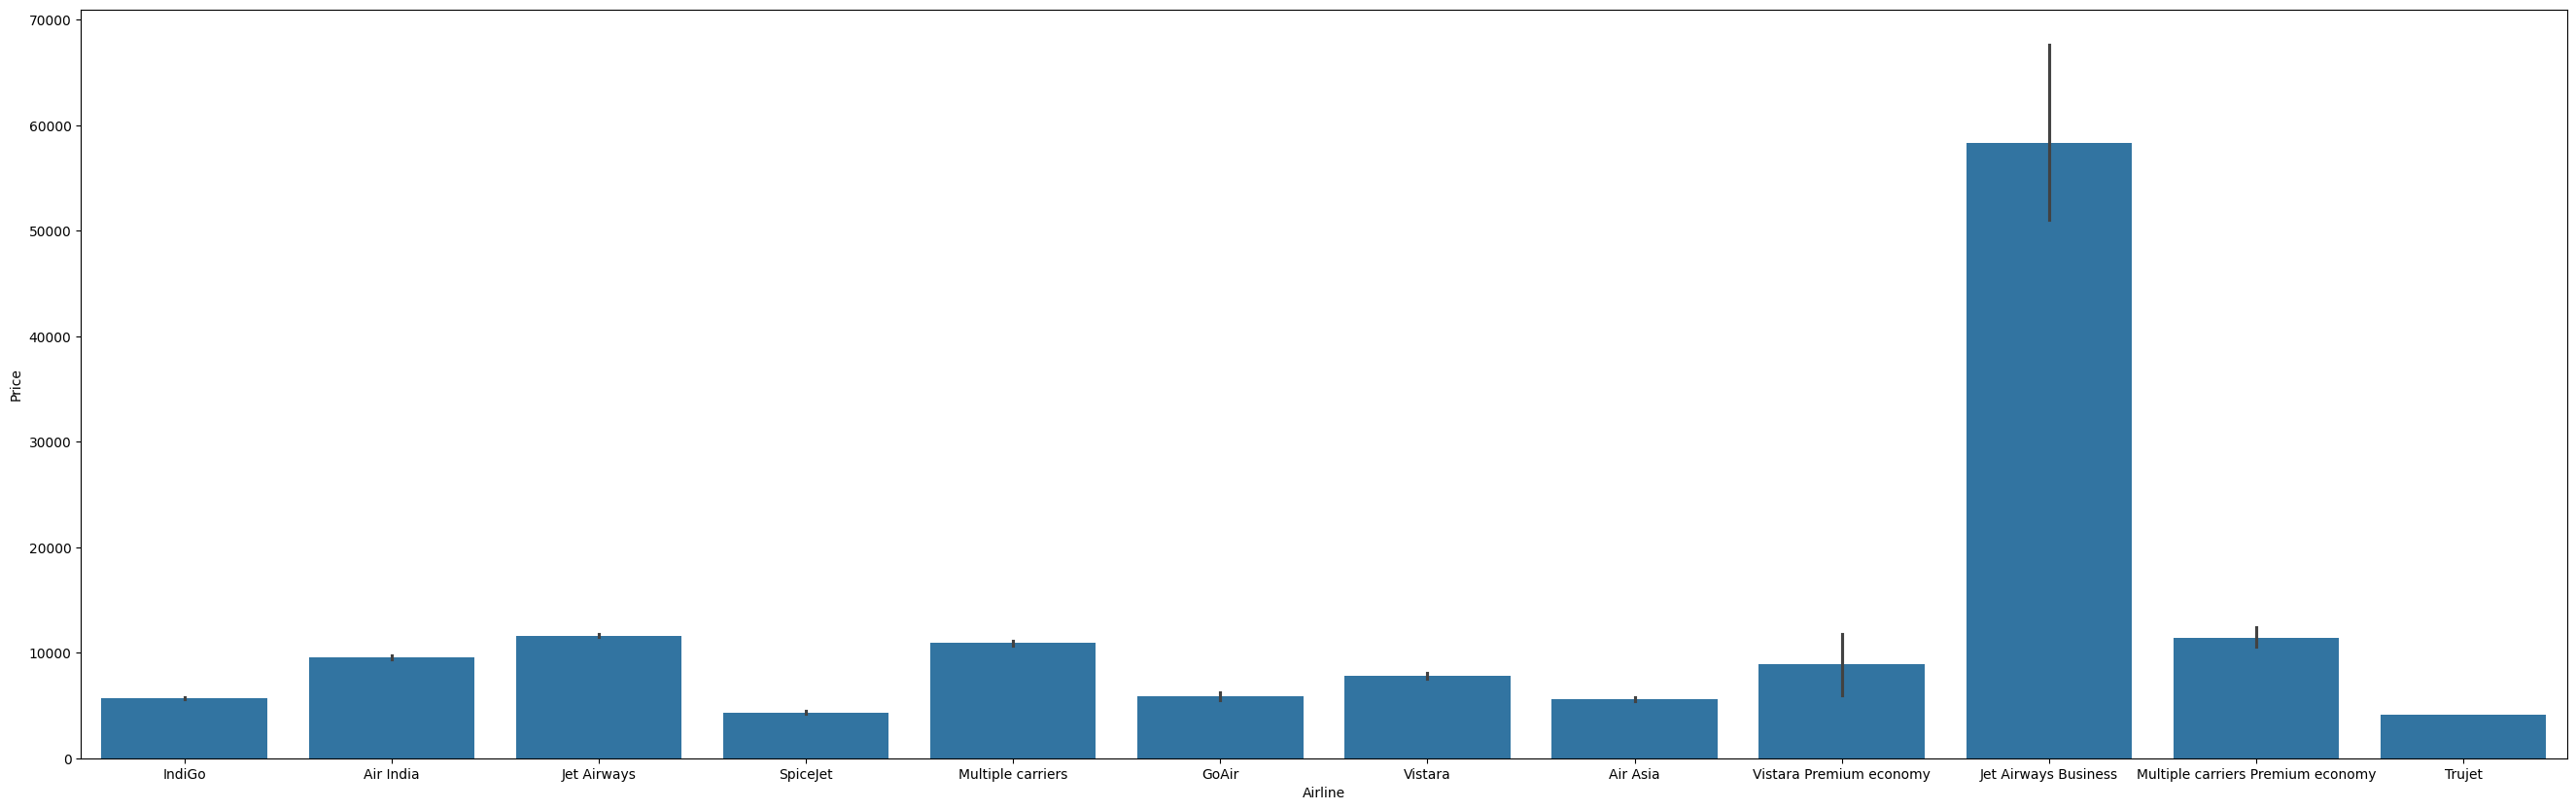

In [23]:
#a
plt.figure(figsize=(33,10))
sns.barplot(data=df,x='Airline',y='Price')
plt.show()

In [24]:
high_price_business_flights = df[(df['Additional_Info'] == 'Business') & (df['Price'] > 50000)]
print(high_price_business_flights)

Empty DataFrame
Columns: [Airline, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price, Date, Month, Year]
Index: []


ENCODING

In [25]:
from sklearn import preprocessing
for col in df.select_dtypes(include=["object"]).columns:
  label_encoding = preprocessing.LabelEncoder()
  label_encoding.fit(df[col].unique())
  df[col] = label_encoding.transform(df[col])
  print(f"{col}:{df[col].unique()}")

Airline:[ 3  1  4  8  6  2 10  0 11  5  7  9]
Source:[0 3 2 1 4]
Destination:[5 0 1 4 2 3]
Route:[ 18  84 118  91  29  64   5 104 103 127  66  97 123 105  17 113 119  78
 122  90 111  80 106  73   3  45 121  48 102 116  99 117  61  28 108 101
  87  60  24 125  85 115  82   9 126 112  67  15  68 124 110  72  93  16
  74  30  51   4  98  27  77  46  65  63 107 120   0  33  88  59  95   6
   1  20  36  44 114  92  12  62  10  13  19  39  53  25  89  70 100  34
  52 109  94  96  76   7  75  43  55   2  71  69  38  42  32  26  86  79
  47  40  54  11  57  35  22  81  56  21  49  41  31  83  50  58  23   8
  14  37]
Dep_Time:[211  31  70 164 149  66 172  55  65  91  74 188  94 198 154 147  63 118
 187 141 120 207  16 201 205  45  46  75 125  83 130 121  42 195  88  30
 173 218  86  72 199 221 181  64 137  34 129 117  32 111  23  38 157  58
 183  39 119   7  73  59 189 110   9 150 193  25 182 184  35 178  19 106
 165 155 134 217  98 127  96  92 126 175  33 220  52 108 103 131 105 167
 145   3

<Axes: xlabel='Price'>

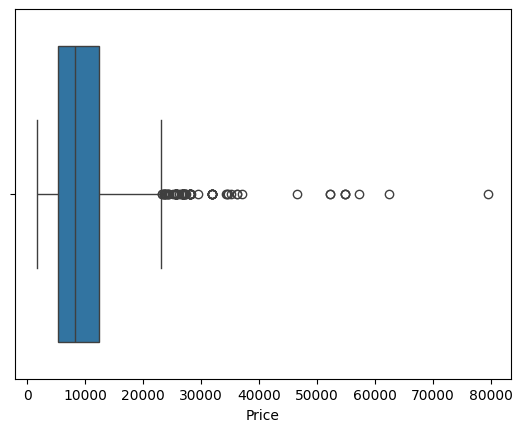

In [26]:
sns.boxplot(data=df,x='Price')


INTER-QUARTILE RANGE

In [27]:
Q1=df['Price'].quantile(0.25)
Q3=df['Price'].quantile(0.75)
IQR=Q3-Q1
iqr_upper=Q3+1.5*IQR
iqr_lower=Q1-1.5*IQR
print(iqr_upper)
print(iqr_lower)

23022.75
-5455.25


In [28]:
df=df[(df['Price']<iqr_upper)&(df['Price']>iqr_lower)]

In [29]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,3,0,5,18,211,233,240,4,8,3897,24,3,2019
1,1,3,0,84,31,906,336,1,8,7662,1,5,2019
2,4,2,1,118,70,413,106,1,8,13882,9,6,2019
3,3,3,0,91,164,1324,311,0,8,6218,12,5,2019
4,3,0,5,29,149,1237,303,0,8,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,183,1259,236,4,8,4107,9,4,2019
10679,1,3,0,64,193,1305,237,4,8,4145,27,4,2019
10680,4,0,2,18,58,824,280,4,8,7229,27,4,2019
10681,10,0,5,18,92,938,238,4,8,12648,1,3,2019


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10369 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10369 non-null  int64
 1   Source           10369 non-null  int64
 2   Destination      10369 non-null  int64
 3   Route            10369 non-null  int64
 4   Dep_Time         10369 non-null  int64
 5   Arrival_Time     10369 non-null  int64
 6   Duration         10369 non-null  int64
 7   Total_Stops      10369 non-null  int64
 8   Additional_Info  10369 non-null  int64
 9   Price            10369 non-null  int64
 10  Date             10369 non-null  int32
 11  Month            10369 non-null  int32
 12  Year             10369 non-null  int32
dtypes: int32(3), int64(10)
memory usage: 1012.6 KB


**Splitting and training the data**

In [31]:
import numpy as np
df["price_log"]=np.log1p(df["Price"])

<ipython-input-31-7f4650464a65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price_log"]=np.log1p(df["Price"])


In [32]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,price_log
0,3,0,5,18,211,233,240,4,8,3897,24,3,2019,8.268219
1,1,3,0,84,31,906,336,1,8,7662,1,5,2019,8.944159
2,4,2,1,118,70,413,106,1,8,13882,9,6,2019,9.538420
3,3,3,0,91,164,1324,311,0,8,6218,12,5,2019,8.735364
4,3,0,5,29,149,1237,303,0,8,13302,1,3,2019,9.495745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,183,1259,236,4,8,4107,9,4,2019,8.320692
10679,1,3,0,64,193,1305,237,4,8,4145,27,4,2019,8.329899
10680,4,0,2,18,58,824,280,4,8,7229,27,4,2019,8.885994
10681,10,0,5,18,92,938,238,4,8,12648,1,3,2019,9.445333


In [33]:
df.drop('Price',axis=1,inplace=True)

<ipython-input-33-9d335c789bb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Price',axis=1,inplace=True)


In [34]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,price_log
0,3,0,5,18,211,233,240,4,8,24,3,2019,8.268219
1,1,3,0,84,31,906,336,1,8,1,5,2019,8.944159
2,4,2,1,118,70,413,106,1,8,9,6,2019,9.538420
3,3,3,0,91,164,1324,311,0,8,12,5,2019,8.735364
4,3,0,5,29,149,1237,303,0,8,1,3,2019,9.495745
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,183,1259,236,4,8,9,4,2019,8.320692
10679,1,3,0,64,193,1305,237,4,8,27,4,2019,8.329899
10680,4,0,2,18,58,824,280,4,8,27,4,2019,8.885994
10681,10,0,5,18,92,938,238,4,8,1,3,2019,9.445333


In [35]:
x=df.drop(['price_log'],axis=1)
y=df['price_log']
print(y)

0        8.268219
1        8.944159
2        9.538420
3        8.735364
4        9.495745
           ...   
10678    8.320692
10679    8.329899
10680    8.885994
10681    9.445333
10682    9.371949
Name: price_log, Length: 10369, dtype: float64


**ALGORITHMS-MACHINE LEARNING**

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
r2= r2_score(y_test, y_pred)
print(r2)

0.5043634529692083


In [39]:
model1.score(x_train,y_train)  #train value

0.5148254507839303

In [40]:
from sklearn.tree import DecisionTreeRegressor
model2= DecisionTreeRegressor()
model2.fit(x_train,y_train)
y2_pred = model2.predict(x_test)
r21 = r2_score(y_test, y2_pred)
print(r21)

0.9077819596698009


In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

param_distributions = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions, n_iter=100, cv=5, scoring='r2')
random_search.fit(x_train, y_train)
best_model = random_search.best_estimator_
y3_pred = best_model.predict(x_test)
r211 = r2_score(y_test, y3_pred)
print(r211)

0.9107874261828306


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [42]:
model2.score(x_train,y_train)   #train value

0.9962051689582234

In [43]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(x_train, y_train)
y3_pred = model3.predict(x_test)
r22 = r2_score(y_test, y3_pred)
print(r22)

0.936598903714308


**ALGORITHMS- BOOSTING**

In [44]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
xgboost_model=xgb.XGBRegressor()
xgboost_model.fit(x_train,y_train)
xgb_predictions=xgboost_model.predict(x_test)
mse=mean_squared_error(y_test,xgb_predictions)
mae=mean_absolute_error(y_test,xgb_predictions)
r2_xg=r2_score(y_test,xgb_predictions)
print("mean_squared_error=",mse)
print("mean_absolute_error=",mae)
print("r2=",r2_xg)

mean_squared_error= 0.01348152020102528
mean_absolute_error= 0.0762705838188163
r2= 0.9469180595111057


In [45]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boosting_model=GradientBoostingRegressor()
gradient_boosting_model.fit(x_train,y_train)
gradient_predictions=gradient_boosting_model.predict(x_test)
mse=mean_squared_error(y_test,gradient_predictions)
mae=mean_absolute_error(y_test,gradient_predictions)
r2_gr=r2_score(y_test,gradient_predictions)
print("mean_squared_error=",mse)
print("mean_absolute_error=",mae)
print("r2=",r2_gr)

mean_squared_error= 0.03495074777776935
mean_absolute_error= 0.13754352782661328
r2= 0.8623854368114354


In [46]:
!pip install catboost
from catboost import CatBoostRegressor
catboost_model=CatBoostRegressor()
catboost_model.fit(x_train,y_train)
cat_predictions=catboost_model.predict(x_test)
mse=mean_squared_error(y_test,cat_predictions)
mae=mean_absolute_error(y_test,cat_predictions)
r2_cat=r2_score(y_test,cat_predictions)
print("mean_squared_error=",mse)
print("mean_absolute_error=",mae)
print("r2=",r2_cat)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.4 MB/s eta 0:00:00
Learning rate set to 0.057194
0:	learn: 0.4806445	total: 57.8ms	remaining: 57.8s
1:	learn: 0.4630378	total: 68.9ms	remaining: 34.4s
2:	learn: 0.4454811	total: 82.4ms	remaining: 27.4s
3:	learn: 0.4314216	total: 87.4ms	remaining: 21.8s
4:	learn: 0.4153815	total: 96.6ms	remaining: 19.2s
5:	learn: 0.4004423	total: 101ms	remaining: 16.7s
6:	learn: 0.3874249	total: 105ms	remaining: 14.9s
7:	learn: 0.3741138	total: 109ms	remaining: 13.5s
8:	learn: 0.3624593	total: 111ms	remaining: 12.2s
9:	learn: 0.3520538	total: 114ms	remaining: 11.3s
10:	learn: 0.3429798	total: 117ms	remaining: 10.5s
11:	learn: 0.3339512	total: 120ms	remaining: 9.85s
12:	learn: 0.3247752	total: 123ms	remaining: 9.32s
13:	learn: 0.3168429	total: 125ms	remaining: 8.83s
14:	learn: 0.3084205	total: 128ms	remaining: 8.4s
15:	learn: 0.3014594	total: 130ms	remaining: 8.01s
16:	learn: 0.2943677	total: 133ms	remaining: 7.7s
17:	learn: 0.2883063	total: 137

**TESTING DATASET**

In [47]:
df_test=pd.read_excel("/content/Flight_Price_Test.xlsx")
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [48]:
df_test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [50]:
df_test.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [51]:
df_test.duplicated().sum()

26

In [52]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

<ipython-input-52-da2a6d66ab19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


0

In [53]:
df_test['Date']=pd.to_datetime(df_test['Date_of_Journey'], format='%d/%m/%Y').dt.day # Specify the correct format
df_test['Month']=pd.to_datetime(df_test['Date_of_Journey'], format='%d/%m/%Y').dt.month
df_test['Year']=pd.to_datetime(df_test['Date_of_Journey'], format='%d/%m/%Y').dt.year

In [54]:
df_test.drop('Date_of_Journey',axis=1,inplace=True)

In [55]:
from sklearn import preprocessing
for col in df_test.select_dtypes(include=["object"]).columns:
  label_encoding = preprocessing.LabelEncoder()
  label_encoding.fit(df_test[col].unique())
  df_test[col] = label_encoding.transform(df_test[col])
  print(f"{col}:{df_test[col].unique()}")

Airline:[ 4  3  6  0  1  9  8 10  2  7  5]
Source:[2 3 0 4 1]
Destination:[1 0 2 5 3 4]
Route:[76 65 16 24 57 43 45 92 83  5 51 88 74 33 68 99 46 75 84 93 60 50 78 62
 91 58 77 56 15 10 40  0 30 80 87 82 52 18  4 85 70 96 94 67 20  8  6 69
 39 21 61 47 72 25 73 19  3 79 71 48 23 64 97 14 98 29 44 89 95 81  7  2
 36 55 11  1 37 54 90 63 66 35 13 27 49 31 34 53 17  9 86 41 26 22 38 28
 12 42 59 32]
Dep_Time:[138  31 156  48 198 146  44 116  70 127 101  36  58  24 181  96  68 193
  75 164  21 177 124 102 192 162  40  26 132 152  71 135  93 191 176 141
  62 103  66   5  84 133  27  39 130 160  10 179  82  88 183  25  47  59
  51  63  69 112 186  38 163 158 113  22  34 136 180  45  37 139  79 167
 169  23 114 175 107 161  52 184 178   6  53 172 105 109  78 159 117  29
 188  54 110  65   3  56 154  57  83  15 104  64 142 121   9   1 153 195
  81  20  19  91  35 145  98  61   7 197  46  87 168  50 137  67 122  74
 108  33  86 155 173 115 131 128  73  13  11  12 148 119 157  95  94  60
 170  9

In [56]:
xgboost_model=xgb.XGBRegressor()
xgboost_model.fit(x_train,y_train)
xgb_predictions=xgboost_model.predict(df_test)
print(xgb_predictions)

[9.05567  8.699493 9.595645 ... 9.269615 9.43776  9.064143]


**CONCLUSION**

In [57]:
model_performance = {
    'Linear Regression': r2,
    'Decision Tree': r211,
    'Random Forest': r22,
    'XGBoost': r2_xg,
    'Gradient Boosting': r2_gr,
    'CatBoost': r2_cat
}

optimum_model = max(model_performance, key=model_performance.get)
print(f"The optimum model is: {optimum_model} with r2: {model_performance[optimum_model]}")

The optimum model is: XGBoost with r2: 0.9469180595111057


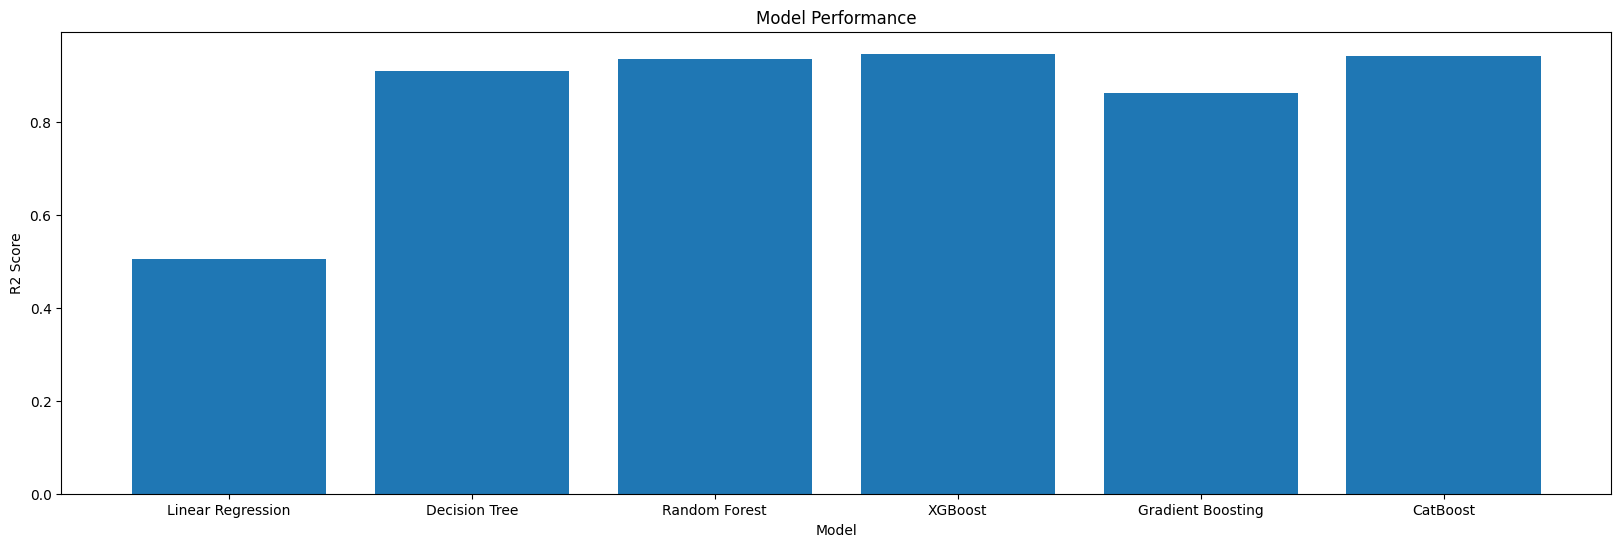

In [58]:
plt.figure(figsize=(20, 6))
plt.bar(model_performance.keys(), model_performance.values())
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Model Performance')
plt.show()

From the business perspective, the xgboost performs the best with the good r2 score which indicates better performance. This would provide the most accurate predictions for flight prices. This model can be used for pricing predictions and can be further improved by tuning hyperparameters.